In [53]:
import requests
from bs4 import BeautifulSoup
import json
import  pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt

from mplsoccer.pitch import VerticalPitch

In [54]:
# scrape the single game shots (14811)
base_url = 'https://understat.com/match/'
match = str(input('Please enter the match id : '))
url = base_url + match

In [55]:
url

'https://understat.com/match/14811'

In [56]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [57]:
# get only the shots data
strings = scripts[1].string 

In [58]:
# strip smbole so we only have the json data
ind_start = strings.index("('") + 2
ind_end = strings.index("')")

json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

# convert string to json format
data = json.loads(json_data)

In [59]:
x = []
y = []
xg = []
team = []
data_away = data['a']
data_home = data['h']

for i in range(len(data_home)):
    for key in data_home[i]:
        if key == 'X':
            x.append(data_home[i][key])
        if key == 'Y':
            y.append(data_home[i][key])
        if key == 'xG':
            xg.append(data_home[i][key])
        if key == 'h_team':
            team.append(data_home[i][key])

for i in range(len(data_away)):
    for key in data_away[i]:
        if key == 'X':
            x.append(data_away[i][key])
        if key == 'Y':
            y.append(data_away[i][key])
        if key == 'xG':
            xg.append(data_away[i][key])
        if key == 'a_team':
            team.append(data_away[i][key])

In [60]:
# create the dataframe
col_name = ['x', 'y', 'xg', 'team']
df = pd.DataFrame([x,y,xg,team], index=col_name)
df = df.T

In [61]:
df

,x,y,xg,team
0,0.9490000152587891,0.3370000076293945,0.11425195634365082,Manchester City
1,0.9159999847412109,0.5479999923706055,0.10734514147043228,Manchester City
2,0.7680000305175781,0.62,0.02420051582157612,Manchester City
3,0.8859999847412109,0.5970000076293945,0.411928653717041,Manchester City
4,0.8630000305175781,0.355,0.027450280264019966,Manchester City
5,0.9130000305175782,0.6990000152587891,0.05079907178878784,Manchester City
6,0.8690000152587891,0.635,0.06847094744443893,Manchester City
7,0.7959999847412109,0.555,0.05394935980439186,Manchester City
8,0.86,0.4620000076293945,0.12700651586055756,Manchester City
9,0.8419999694824218,0.5359999847412109,0.03999857231974602,Manchester City


In [ ]:
def halfSpaceVerticalPitch():
    # Draw the pitch
    fig, ax = plt.subplots(figsize=(16,11))
    fig.set_facecolor('#657c8f')
    ax.set_facecolor('#657c8f')

    pitch = VerticalPitch(pitch_type='statsbomb', 
                pitch_color='white', line_color='black', 
                positional=True, shade_middle=False, 
                positional_color='#657c8f', shade_color='#f2f2f2',
                axis=True, label=False,
                half=False)

    pitch.draw(ax=ax,  figsize=(13,8), constrained_layout=True, tight_layout=False)
    # plt.gca().invert_yaxis() 

    # Illuminate half-spaces
    rect1 = plt.Rectangle((18.2, 18.5), 11.6, 83.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect1)
    rect2 = plt.Rectangle((50.2, 18.5), 11.6, 83.5, color="#8298ab", alpha=0.2)
    ax.add_patch(rect2) 
    return fig, ax

Text(0.5, 1.0, 'Manchester City vs Everton (23/05/21)')

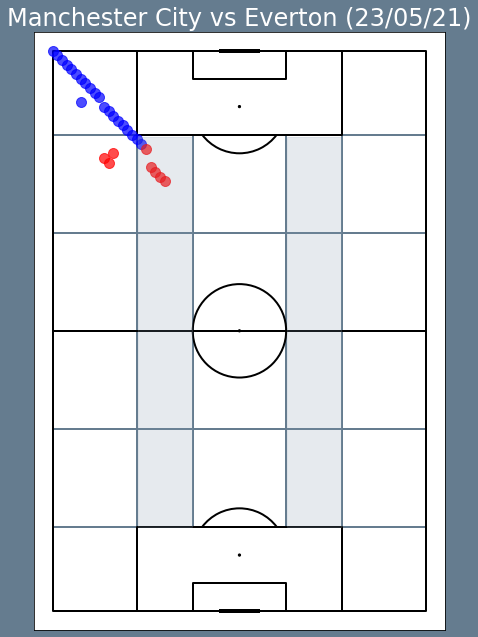

In [ ]:
fig, ax = halfSpaceVerticalPitch()

plt.gca().invert_yaxis()

for i in range(len(df['x'])):
    if df['team'][i] == 'Manchester City':
        plt.scatter(df['x'][i], df['y'][i], c='blue', s=100, alpha=0.7)
    elif df['team'][i] == 'Everton':
        plt.scatter(df['x'][i], df['y'][i], c='red', s=100, alpha=0.7)

plt.title('Manchester City vs Everton (23/05/21)', fontsize=24, c='w')